In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
# from keras.applications import MobileNet as PretrainedModel
# from keras.applications.mobilenet import preprocess_input

from tensorflow.keras.layers import Dense, Flatten, Input, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet import MobileNet as PretrainedModel, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

In [8]:
train_path = 'D://ML/Datasets/dogs-vs-cats/train/train'
valid_path = 'D://ML/Datasets/dogs-vs-cats/test1/test1'

In [6]:
IMAGE_SIZE=[200,200]

In [7]:
ptm = PretrainedModel(input_shape = IMAGE_SIZE+[3], weights ='imagenet', include_top = False)  #imports the mobilenet model and discards the last 1000 neuron layer.

In [ ]:
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(2,activation='softmax')(x) #final layer with softmax activation

In [189]:
model=Model(inputs=base_model.input,outputs=preds)

In [190]:
#for i,layer in enumerate(model.layers):
#    print(i,layer.name)
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, None, None, 3)     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)    128       
__________

In [191]:
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [192]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory('D:\Downloads\Hand writing\Downloads\Soil', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=10,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 16 images belonging to 2 classes.


In [193]:
validation_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

validation_generator = validation_datagen.flow_from_directory(r'D:\Downloads\Hand writing\Downloads\Soil',
                                                              target_size=(224,224),
                                                              color_mode='rgb',
                                                              batch_size=10,
                                                              class_mode='categorical',
                                                              shuffle=True)

Found 16 images belonging to 2 classes.


In [194]:
train_generator.n//train_generator.batch_size

1

In [195]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy
step_size_train=train_generator.n//train_generator.batch_size
validation_steps=validation_generator.n//validation_generator.batch_size

history=model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,epochs=10,
                   validation_data=validation_generator,validation_steps=validation_steps)

Epoch 1/10
1/1 [==============================] - 31s 31s/step - loss: 0.7793 - acc: 0.4000 - val_loss: 1.5104 - val_acc: 0.6000
Epoch 2/10
1/1 [==============================] - 2s 2s/step - loss: 0.8172 - acc: 0.6667 - val_loss: 2.9980 - val_acc: 0.5000
Epoch 3/10
1/1 [==============================] - 2s 2s/step - loss: 0.8184 - acc: 0.6000 - val_loss: 0.3180 - val_acc: 0.8000
Epoch 4/10
1/1 [==============================] - 2s 2s/step - loss: 6.5798e-04 - acc: 1.0000 - val_loss: 0.0593 - val_acc: 1.0000
Epoch 5/10
1/1 [==============================] - 2s 2s/step - loss: 0.1286 - acc: 0.9000 - val_loss: 0.0066 - val_acc: 1.0000
Epoch 6/10
1/1 [==============================] - 2s 2s/step - loss: 0.1077 - acc: 1.0000 - val_loss: 0.1226 - val_acc: 0.8333
Epoch 7/10
1/1 [==============================] - 2s 2s/step - loss: 0.0255 - acc: 1.0000 - val_loss: 0.4500 - val_acc: 0.8000
Epoch 8/10
1/1 [==============================] - 2s 2s/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss:

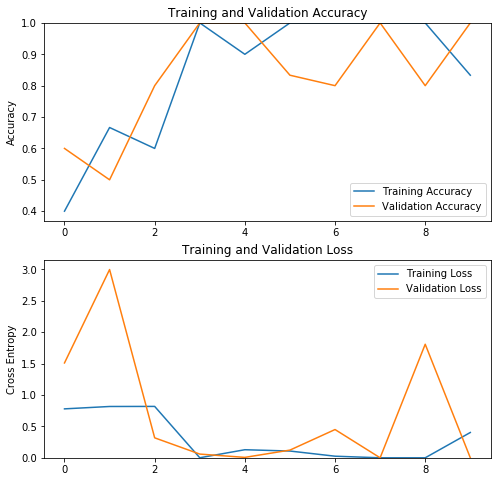

In [196]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

In [198]:
s=0
k=0
for i in val_acc:
    s=s+i
    k=k+1

#print(val_acc)
print((s/k)*100)

83.33333373069763


In [254]:
test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies
pred_dir=r'D:\Downloads\Hand writing\Downloads\Test\test good'

test_generator = test_datagen.flow_from_directory(
    directory=pred_dir,
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=32,
    class_mode=None,
    shuffle=False
)

Found 1 images belonging to 1 classes.


In [255]:
test_generator.reset()

In [256]:
pred=model.predict_generator(test_generator,verbose=1,steps=1)

1/1 [==============================] - 1s 520ms/step


In [257]:
pred.shape

(1, 2)

In [258]:
predicted_class_indices=np.argmax(pred,axis=1)

In [259]:
predicted_class_indices

array([1], dtype=int64)

In [260]:
labels = (train_generator.class_indices)
print(labels)
labels = dict((v,k) for k,v in labels.items())
print(labels)
predictions = [labels[k] for k in predicted_class_indices]
predictions

{'bad fertility': 0, 'good fertility': 1}
{0: 'bad fertility', 1: 'good fertility'}


['good fertility']

In [128]:
from tqdm import tqdm
import os
import cv2
TRAIN_DIR=r'D:\Downloads\Hand writing\Downloads\Soil'
td=[]
import numpy as np
for img in tqdm(os.listdir(TRAIN_DIR)):
    path=os.path.join(TRAIN_DIR, img)
    img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    img=cv2.resize(img,(224,224))
    td.append(np.array(img))
td=tf.keras.utils.normalize(td, axis=1)

  0%|                                                                                            | 0/2 [00:00<?, ?it/s]


error: OpenCV(3.4.2) C:\Miniconda3\conda-bld\opencv-suite_1534379934306\work\modules\imgproc\src\resize.cpp:4044: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [116]:
import matplotlib.pyplot as plt
for i in range(0,len(td)):
    d=td[i]
    fig = plt.figure()
    fig.suptitle(predictions[i], fontsize=14, fontweight='bold')
    plt.imshow(d)